# [ATM 623: Climate Modeling](../index.ipynb)

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 9.5: Radiative-Convective Equilibrium

### About these notes:

This document uses the interactive [`IPython notebook`](http://ipython.org/notebook.html) format (now also called [`Jupyter`](https://jupyter.org)). The notes can be accessed in several different ways:

- The interactive notebooks are hosted on `github` at https://github.com/brian-rose/ClimateModeling_courseware
- The latest versions can be viewed as static web pages [rendered on nbviewer](http://nbviewer.ipython.org/github/brian-rose/ClimateModeling_courseware/blob/master/index.ipynb)
- A complete snapshot of the notes as of May 2015 (end of spring semester) are [available on Brian's website](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/index.html).

Many of these notes make use of the `climlab` package, available at https://github.com/brian-rose/climlab

## Contents

1. [First section title](#section1)

These notes are unfinished...

____________
<a id='section1'></a>

## 1. A Radiative-Convective Model (RCM) using the RRTMG radiation module
____________

`climlab` (as of version 0.5, Spring 2017) provides two different "GCM-level" radiation codes:

- The [CAM3 radiation module](http://climlab.readthedocs.io/en/latest/api/climlab.radiation.cam3.cam3.html) from NCAR (essentially the same radiation code used in our CESM slab ocean simulations)
- The [RRTMG (Rapid Radiative Transfer Model)](http://climlab.readthedocs.io/en/latest/api/climlab.radiation.rrtm.html) which is used in many current GCMs.

The links above take you to the online [climlab documentation](http://climlab.readthedocs.io/en/latest/intro.html).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
#  Some imports needed to make and display animations
from IPython.display import HTML
from matplotlib import animation

####  Here is an example of building a single-column RCM in climlab

In [2]:
import climlab
#  Choose the surface albedo
alb = 0.2
#  State variables (Air and surface temperature)
state = climlab.column_state(num_lev=50)
#  Parent model process
rcm = climlab.TimeDependentProcess(state=state)
#  Fixed relative humidity
h2o = climlab.radiation.ManabeWaterVapor(state=state)
#  Couple water vapor to radiation
rad = climlab.radiation.RRTMG(state=state, specific_humidity=h2o.q, albedo=alb)
#  Convective adjustment
conv = climlab.convection.ConvectiveAdjustment(state=state, adj_lapse_rate=6)
#  Couple everything together
rcm.add_subprocess('Radiation', rad)
rcm.add_subprocess('WaterVapor', h2o)
rcm.add_subprocess('Convection', conv)
#rcm.compute_diagnostics()

print rcm

Getting ozone data from /Users/br546577/code/climlab/climlab/data/ozone/apeozone_cam3_5_54.nc
climlab Process of type <class 'climlab.process.time_dependent_process.TimeDependentProcess'>. 
State variables and domain shapes: 
  Tatm: (50,) 
  Ts: (1,) 
The subprocess tree: 
top: <class 'climlab.process.time_dependent_process.TimeDependentProcess'>
   Convection: <class 'climlab.convection.convadj.ConvectiveAdjustment'>
   Radiation: <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
      LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>
      SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>
   WaterVapor: <class 'climlab.radiation.water_vapor.ManabeWaterVapor'>



For convenience we still have our handle to the `Radiation` subprocess:

In [3]:
rad is rcm.subprocess.Radiation

True

The `RRTMG` radiation module is actually comprised of two `subprocesses`:

In [4]:
print rad

climlab Process of type <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>. 
State variables and domain shapes: 
  Tatm: (50,) 
  Ts: (1,) 
The subprocess tree: 
top: <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
   LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>
   SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>



In [5]:
print rad.subprocess.LW

print rad.subprocess.SW

climlab Process of type <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>. 
State variables and domain shapes: 
  Tatm: (50,) 
  Ts: (1,) 
The subprocess tree: 
top: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>

climlab Process of type <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>. 
State variables and domain shapes: 
  Tatm: (50,) 
  Ts: (1,) 
The subprocess tree: 
top: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>



### What radiatively active gases are in this model?

They are defined in a dictionary that is shared with the `LW` and `SW` subprocesses:

In [6]:
#  Volumetric mixing ratios
rad.absorber_vmr

{'CCL4': 0.0,
 'CFC11': 0.0,
 'CFC12': 0.0,
 'CFC22': 0.0,
 'CH4': 1.65e-06,
 'CO2': 0.000348,
 'N2O': 3.06e-07,
 'O2': 0.21,
 'O3': array([  8.49933725e-06,   4.48576690e-06,   2.25137178e-06,
          1.13532298e-06,   6.61862588e-07,   4.41032900e-07,
          3.18477002e-07,   2.45552383e-07,   2.00235820e-07,
          1.66251001e-07,   1.37260417e-07,   1.14054576e-07,
          9.29020109e-08,   8.01070865e-08,   6.83827083e-08,
          6.34392413e-08,   5.84957744e-08,   5.57122567e-08,
          5.33033466e-08,   5.10772439e-08,   4.93420300e-08,
          4.76068161e-08,   4.60528063e-08,   4.48079957e-08,
          4.35631852e-08,   4.23784162e-08,   4.16341607e-08,
          4.08899052e-08,   4.01456497e-08,   3.94640551e-08,
          3.88467978e-08,   3.82295406e-08,   3.76122833e-08,
          3.68509303e-08,   3.59191566e-08,   3.49873829e-08,
          3.40556092e-08,   3.31238355e-08,   3.21055234e-08,
          3.10854767e-08,   3.00654301e-08,   2.90453834e-08,


In [7]:
rad.absorber_vmr is rad.subprocess.LW.absorber_vmr

True

In [8]:
rad.absorber_vmr is rad.subprocess.SW.absorber_vmr

True

In [9]:
#  E.g. the CO2 content (a well-mixed gas) in parts per million
rad.absorber_vmr['CO2'] * 1E6

348.0

### The RRTMG radiation model has lots of different input parameters

For details you can look at the [documentation](http://climlab.readthedocs.io/en/latest/api/climlab.radiation.radiation.html)

In [10]:
rad.input.keys()

['r_ice',
 'tauc_lw',
 'dyofyr',
 'absorber_vmr',
 'S0',
 'icld',
 'liqflgsw',
 'specific_humidity',
 'liqflglw',
 'tauaer_sw',
 'tauc_sw',
 'asmaer_sw',
 'asdif',
 'asmc_sw',
 'eccentricity_factor',
 'coszen',
 'ssac_sw',
 'permuteseed_lw',
 'bndsolvar',
 'solcycfrac',
 'asdir',
 'insolation',
 'fsfc_sw',
 'iceflgsw',
 'irng',
 'inflglw',
 'ssaaer_sw',
 'tauaer_lw',
 'isolvar',
 'r_liq',
 'ciwp',
 'clwp',
 'aldir',
 'inflgsw',
 'iceflglw',
 'indsolvar',
 'aldif',
 'permuteseed_sw',
 'ecaer_sw',
 'cldfrac',
 'emissivity',
 'idrv']

Many of the parameters control the radiative effects of clouds.

But here we should note that the model is initialized with no clouds at all:

In [11]:
rad.cldfrac

0.0

### What interesting diagnostic quantities are computed?

In [12]:
rcm.diagnostics.keys()

['OLRclr',
 'SW_flux_down_clr',
 'LW_sfc_clr',
 'SW_flux_net_clr',
 'TdotSW_clr',
 'TdotLW_clr',
 'OLRcld',
 'ASR',
 'SW_sfc',
 'SW_sfc_clr',
 'LW_sfc',
 'LW_flux_down',
 'OLR',
 'LW_flux_net_clr',
 'q',
 'SW_flux_up_clr',
 'ASRcld',
 'TdotSW',
 'SW_flux_up',
 'LW_flux_up',
 'ASRclr',
 'LW_flux_up_clr',
 'LW_flux_net',
 'SW_flux_net',
 'LW_flux_down_clr',
 'SW_flux_down',
 'TdotLW']

A feature of `climlab` is that diagnostics computed by a `subprocess` are automatically added to the parent process:

In [13]:
h2o.diagnostics.keys()

['q']

In [14]:
rad.subprocess.SW.diagnostics.keys()

['ASR',
 'SW_flux_down_clr',
 'SW_flux_net_clr',
 'TdotSW_clr',
 'SW_flux_up',
 'ASRcld',
 'TdotSW',
 'SW_flux_net',
 'SW_sfc_clr',
 'SW_sfc',
 'SW_flux_down',
 'ASRclr',
 'SW_flux_up_clr']

____________
<a id='section2'></a>

## 2. Adjustment toward Radiative-Convective Equilibrium
____________

We are going to look at the time-dependent adjustment of the column from an isothermal initial state to a final Radiative-Convective equilibrium.

In [15]:
#  We will plot temperatures with respect to log(pressure) to get a height-like coordinate
def zstar(lev):
    return -np.log(lev / climlab.constants.ps)

In [16]:
#  Compute all tendencies in K/day
#  as of climlab 0.5.0 there is a bug in the units for ConvectiveAdjustment
#   which we account for here

def get_tendencies(model):
    from collections import OrderedDict
    tendencies_atm = OrderedDict()
    tendencies_sfc = OrderedDict()

    tendencies_atm['Convection'] = rcm.subprocess['Convection'].tendencies['Tatm']
    tendencies_atm['LW radiation'] = (rcm.subprocess['Radiation'].subprocess['LW'].tendencies['Tatm']
                                  * climlab.constants.seconds_per_day)
    tendencies_atm['SW radiation'] = (rcm.subprocess['Radiation'].subprocess['SW'].tendencies['Tatm']
                                  * climlab.constants.seconds_per_day)
    tendencies_atm['Radiation (net)'] = tendencies_atm['LW radiation'] + tendencies_atm['SW radiation']
    tendencies_atm['Total'] = tendencies_atm['Radiation (net)'] + tendencies_atm['Convection']

    tendencies_sfc['Convection'] = rcm.subprocess['Convection'].tendencies['Ts']
    tendencies_sfc['LW radiation'] = (rcm.subprocess['Radiation'].subprocess['LW'].tendencies['Ts']
                                  * climlab.constants.seconds_per_day)
    tendencies_sfc['SW radiation'] = (rcm.subprocess['Radiation'].subprocess['SW'].tendencies['Ts']
                                  * climlab.constants.seconds_per_day)
    tendencies_sfc['Radiation (net)'] = tendencies_sfc['LW radiation'] + tendencies_sfc['SW radiation']
    tendencies_sfc['Total'] = tendencies_sfc['Radiation (net)'] + tendencies_sfc['Convection']
    return tendencies_atm, tendencies_sfc

In [17]:
def setup_figure():
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    axes[1].set_xlabel('Temperature tendency (K/day)', fontsize=14)
    axes[1].set_xlim(-6,6)
    axes[0].set_xlim(190,320)
    axes[0].set_xlabel('Temperature (K)', fontsize=14)
    for ax in axes:
        yticks = np.array([1000., 750., 500., 250., 100., 50., 20., 10., 5.])
        ax.set_yticks(zstar(yticks))
        ax.set_yticklabels(yticks)
        ax.set_ylabel('Pressure (hPa)', fontsize=14)
        ax.grid()
    twinax = axes[0].twiny()
    twinax.set_xlim(0,15)
    twinax.set_title('Specific humidity (g/kg)')
    axes = np.append(axes, twinax)
    fig.suptitle('Adjustment to Radiative-Convective Equilibrium with RRTMG radiation model', fontsize=14)
    return fig, axes

### Plot the profiles of temperature, humidity, and temperature tendencies

Starting from an **isothermal** initial condition

In [18]:
def initial_figure(model):
    #  Make figure and axes
    fig, axes = setup_figure()
    # plot initial data
    lines = []
    lines.append(axes[0].plot(model.Tatm, zstar(model.lev), color='b')[0])
    lines.append(axes[0].plot(model.Ts, 0, 'o', markersize=8, color='b')[0])
    lines.append(axes[2].plot(model.q*1E3, zstar(model.lev))[0])
    ax = axes[1]
    color_cycle=['y', 'r', 'b', 'g', 'k']
    tendencies_atm, tendencies_sfc = get_tendencies(model)
    for i, name in enumerate(tendencies_atm):
        lines.append(ax.plot(tendencies_atm[name], zstar(model.lev), label=name, color=color_cycle[i])[0])
    for i, name in enumerate(tendencies_sfc):
        lines.append(ax.plot(tendencies_sfc[name], 0, 'o', markersize=8, color=color_cycle[i])[0])
    ax.legend(loc='center right');
    return fig, axes, lines

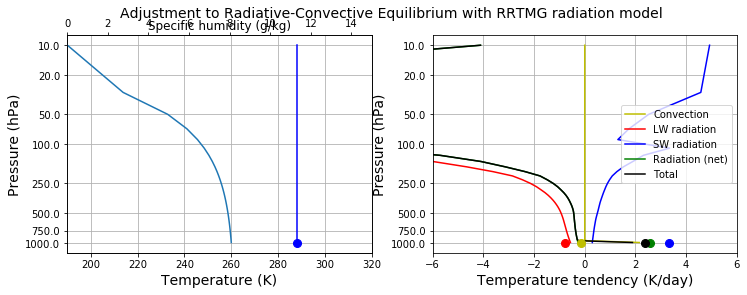

In [19]:
#  Start from isothermal state
rcm.state.Tatm[:] = rcm.state.Ts
#  Call the diagnostics once for initial plotting
rcm.compute_diagnostics()
#  Plot initial data
fig, axes, lines = initial_figure(rcm)

### Now let's step forward in time and animate the solution

In [20]:
def animate(i, model, lines):
    model.step_forward()
    lines[0].set_xdata(model.Tatm)
    lines[1].set_xdata(model.Ts)
    lines[2].set_xdata(model.q*1E3)
    tendencies_atm, tendencies_sfc = get_tendencies(model)
    for i, name in enumerate(tendencies_atm):
        lines[3+i].set_xdata(tendencies_atm[name])
    for i, name in enumerate(tendencies_sfc):
        lines[3+5+i].set_xdata(tendencies_sfc[name])
    return lines   

In [21]:
ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, 150), fargs=(rcm, lines))

In [22]:
HTML(ani.to_html5_video())

Plenty of interesting things to see in this animation! Discuss...

### Reaching R-C equilibrium

The model is settling down after 150 days but is not really at equilibrium:

In [23]:
rcm.ASR - rcm.OLR

array([-8.00393254])

So we will integrate it out further (without animation):

In [24]:
rcm.integrate_years(2)
rcm.ASR - rcm.OLR

Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 2.40936014513 years.


array([-0.00031407])

In [25]:
#  The equilibrated surface temperature
rcm.Ts

Field([ 286.95964488])

____________
<a id='section3'></a>

## 3. Forcing and feedback in the RCM
____________

In [26]:
#  Make a clone of our model and double CO2
rcm2 = climlab.process_like(rcm)
rcm2.subprocess['Radiation'].absorber_vmr['CO2'] *= 2.
#  Current CO2 concentration in ppmv
print rcm2.subprocess['Radiation'].absorber_vmr['CO2'] * 1E6

696.0


In [27]:
#  Compute radiation forcing
rcm2.compute_diagnostics()
#  There are now changes in both longwave and shortwave from the increased CO2
DeltaOLR = rcm2.OLR - rcm.OLR
DeltaASR = rcm2.ASR - rcm.ASR
print DeltaOLR, DeltaASR

[-2.58244378] [ 0.056474]


In [28]:
#  The radiative forcing includes both LW and SW components
RF = DeltaASR - DeltaOLR
print 'The radiative forcing for doubling CO2 is %0.2f W/m2.' % (RF)

The radiative forcing for doubling CO2 is 2.64 W/m2.


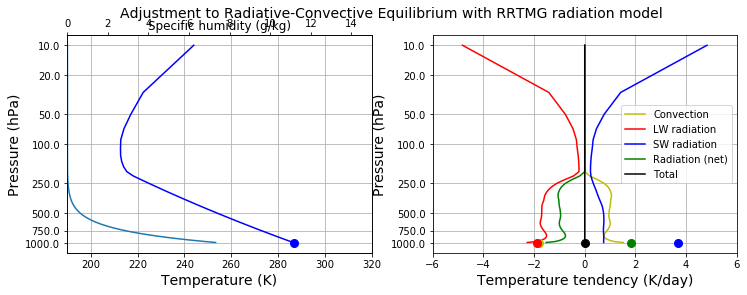

In [29]:
#  Plot initial data
fig, axes, lines = initial_figure(rcm2)

You have to look carefully to see this differences from the equilibrated model above. But the LW cooling rate is *just a little smaller*.

### Adjustment after doubling CO2

In [30]:
rcm_2xCO2 = climlab.process_like(rcm2)

In [31]:
ani_2xCO2 = animation.FuncAnimation(fig, animate, frames=np.arange(1, 100), fargs=(rcm_2xCO2, lines))

In [32]:
HTML(ani_2xCO2.to_html5_video())

Ok, it's a bit like watching paint dry but the model is warming up.

But not yet at equilibrium:

In [33]:
rcm_2xCO2.ASR - rcm_2xCO2.OLR

array([ 1.04349302])

In [34]:
rcm_2xCO2.integrate_years(2)
rcm_2xCO2.ASR - rcm_2xCO2.OLR

Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 4.68182482747 years.


array([ -7.14058189e-06])

In [35]:
DeltaTs = float(rcm_2xCO2.Ts - rcm.Ts)
print 'The equilibrium climate sensitivity is {:0.2f} K.'.format(DeltaTs)

The equilibrium climate sensitivity is 2.28 K.


### Role of water vapor in the warming

In [36]:
rcm_noH2O = climlab.process_like(rcm2)
rcm_noH2O.remove_subprocess('WaterVapor')
print rcm_noH2O

climlab Process of type <class 'climlab.process.time_dependent_process.TimeDependentProcess'>. 
State variables and domain shapes: 
  Tatm: (50,) 
  Ts: (1,) 
The subprocess tree: 
top: <class 'climlab.process.time_dependent_process.TimeDependentProcess'>
   Convection: <class 'climlab.convection.convadj.ConvectiveAdjustment'>
   Radiation: <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
      LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>
      SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>



The specific humidity profile is now fixed.

In [37]:
rcm_noH2O.integrate_years(2)
rcm_noH2O.ASR - rcm_noH2O.OLR

Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 4.40803390189 years.


array([  2.33044489e-07])

Let's double-check to see if the specific humidity field changed.

In [38]:
rcm_noH2O.subprocess['Radiation'].specific_humidity == rcm2.subprocess['Radiation'].specific_humidity

Field([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [39]:
DeltaTs_noH2O = float(rcm_noH2O.Ts - rcm.Ts)
print 'The equilibrium climate sensitivity with water vapor feedback is {:0.2f} K.'.format(DeltaTs_noH2O)

The equilibrium climate sensitivity with water vapor feedback is 1.34 K.


## Some questions to pursue:

- How would you quantify the water vapor feedback in this model?
- What determines the strength of the water vapor feedback?
- What if the distribution of relative humidity changes a little bit as part of the global warming response?

We can investigate this last question actively with our model.

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________

____________
## Version information
____________


In [40]:
%load_ext version_information
%version_information numpy, matplotlib, climlab

Software versions
Python 2.7.12 64bit [GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
IPython 5.1.0
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.11.1
matplotlib 2.0.0
climlab 0.5.1dev0
Wed Mar 08 16:52:29 2017 EST